# Who survived the Titanic disaster 

## Abhisek Chatterjee

### 24th August,2020

## Introduction

The sinking of the Titanic is one of the most infamous shipwrecks in history. 
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, 
killing 1502 out of 2224 passengers and crew.This is a very unforgetable disaster that no one in the world can forget.
It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision.
The Titanic Dataset is a very good dataset for applying machine learning and different other aspects of data science.Our problem here is to apply certain feature engineering,feature selection and visulaiztion techniques to get insights from the data that is available as the training set and then apply certain machine learning models to predict who survived among the test set observations.
We first import some important libraries such as numpy,pandas for data importing and management and matplotlib and seaborn for visulaization.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Now we are to import our given two datasets among which,one is the training set and another is the test set.We do it using the pandas library.

In [4]:
dataset1 = pd.read_csv('train.csv')
dataset2 = pd.read_csv('test.csv')

## The Data

Now let's look at the structure of the training dataset.

In [5]:
dataset1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data has been split into two groups:

training set (train.csv) and test set (test.csv) The training set should be used to build our machine learning models. For the training set, we are provided the outcome variable 'Survived'(whether they survived or not) for each passenger.Our model will be based on features like 'Passengers','Gender' and 'Class. We may also use feature engineering to create new features.

The test set should be used to see how well Our model performs on unseen data. For the test set, we are not provided the 'Survived' variable for each passenger. It is our job to predict these outcomes. For each passenger in the test set,we will use the model that we'd train to predict whether or not they survived the sinking of the Titanic.

Data Dictionary

Survived :  Survival    0 = No, 1 = Yes

pclass :   Ticket      class 1 = 1st, 2 = 2nd, 3 = 3rd

sex :       Male or Female

Age : Age in years

sibsp : No of siblings / spouses aboard the Titanic

parch : No of parents / children aboard the Titanic

ticket: Ticket number

fare : Passenger fare

cabin : Cabin number

embarked : Port of Embarkation     C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes :

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5



Let us see some descriptive statistics. 

## Exploratory Analysis,Feature Engineering & Visualization

In [6]:
#Checing the descriptive statistics of different columns of the training set
dataset1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let us see if our data have any null values.
We also visualize the null values using the seaborn library and heatmap.

In [8]:
#Checking the missing values in the training set 
dataset1.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


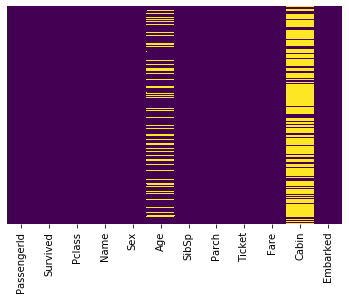

In [9]:
sns.heatmap(dataset1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We will deal with the missing values later.At first,let us see if we can visualize some relationships between the response and different variables. 

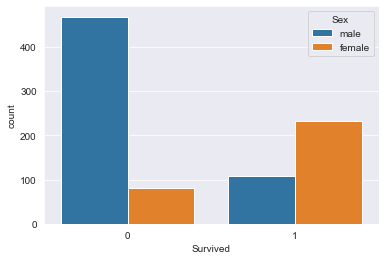

In [79]:
#Visualizing relation between Sex and survival,if any
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=dataset1)

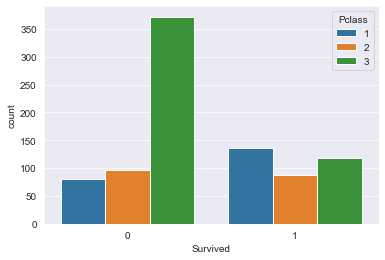

In [80]:
#Visualizing relation between Passenger Class and survival,if any
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset1)

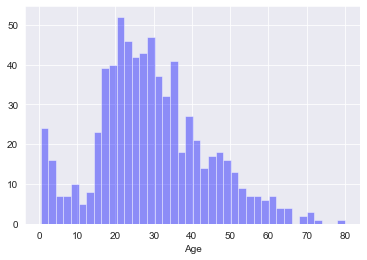

In [81]:
sns.distplot(dataset1['Age'].dropna(),kde=False,color='blue',bins=40)

From the 4 plots above,we observe some interesting relationships among variables.
Most of them who survived were female,most who didn't were male.The female survival ratio is far larger than the male survival ratio.
We can also see a relationship between the passenger class and the survival ratio.Most of them who survived were in class 1 and most of them who didn't survive were in class 3.
Looking at the age distribution,we also see that the average age of the people who were in the training set was between 20 to 30 years.  

Let us now summarize and deal with missing data

In [82]:
print(dataset1.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [83]:
print(dataset2.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


So,we observe that almost 20% observations in the training set and also in the test set have missing values for "Age".
Almost 77% observations in the training set and 78% in the test set have missing values for "Cabin"
So,we have to drop the cabin column and we decide to impute the median for the missing values in the "Age" variable.
There are 2 missing observations in the training set for the varible "Embarked".
There is one missing observation in the test set for the variable "Fare".
We use mode and median imputations for these cases simultaneously.

In [84]:
dataset1['Age'].fillna(dataset1['Age'].median(), inplace = True)
dataset2['Age'].fillna(dataset2['Age'].median(), inplace = True)
dataset1['Embarked'].fillna(dataset1['Embarked'].mode()[0], inplace = True)
dataset2['Fare'].fillna(dataset2['Fare'].median(), inplace = True)

Now,we will drop the "Cabin" column for both the sets of the data.Again,it seems that the columns "PassengerId","Ticket" and "Name" have no role to play in any kind of model fitting,so we drop those columns as well.

In [85]:
dataset1.drop(['Cabin','PassengerId','Name','Ticket'], axis=1, inplace = True)
dataset2.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

As we have the categorical variables 'Embarked' and 'Sex',we have to create dummy variables for them to be included in the model we fit.We also drop the first dummy variables for each of the cases to avoid the dummy variable trap.

In [87]:
#Dealing with categorical variables by creating dummies
traindf = pd.get_dummies(dataset1, columns = ['Embarked','Sex'],drop_first=True)
testdf = pd.get_dummies(dataset2, columns = ['Embarked','Sex'],drop_first=True)

## Model Fitting

We will at first try to get insights by fitting a Logistic Regression model.Let us first see what is the structure of our two datasets after preprocessing.

In [88]:
traindf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [102]:
testdf.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0


We need to validate our model and check our model accuracy,but we don't have the response variable for the test set.So we further split our training set into a training set and a test set.

In [89]:
#Spliting the dataset for cross validation and accuracy checking
from sklearn.model_selection import train_test_split
all_features = traindf.drop("Survived",axis=1)
Response = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Response,test_size=0.3,random_state=2)

We first fit a multiple linear regression model and see how well our model performs on our further splitted test set by using accuracy score.

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train,y_train)
y_pred_lr=classifier.predict(X_test)
print("The accuracy of the model is ",round(accuracy_score(y_pred_lr,y_test)*100,2))

The accuracy of the model is  79.85


The accuracy is almost 80%,let's see if we can improve the score by fitting a Random Forest model.

In [101]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
classifier.fit(X_train,y_train)
y_pred_rf=classifier.predict(X_test)
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(y_pred_rf,y_test)*100,2))

The accuracy of the Random Forest Classifier is 82.09


So,we improved the accuracy by 2%.As of now,we take Random Forest as our final model and now fit again using the whole training set.

In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier_f = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
classifier_f.fit(all_features,Response)
y_pred_f=classifier_f.predict(testdf)

## Prediction and Output 

We get the final predicted vector and export it to a excel file.To submit it to kaggle and check the accuracy score,we need to reshape and rename the output dataset.

In [105]:
y_predicted = pd.DataFrame(y_pred_f)
y_predicted

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [113]:
dataset2 = pd.read_csv('test.csv')
y_predicted['PassengerId']=dataset2['PassengerId']

In [114]:
y_predicted.columns

Index([0, 'PassengerId'], dtype='object')

In [121]:
y_predicted.rename(columns={0: "Survived"},inplace=True)
y_predicted=y_predicted[['PassengerId','Survived']]
y_predicted

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [122]:
y_predicted.to_csv('predicted_tit.csv')

After submitting the csv file to the kaggle competition,the final score for the prediction of the original test set is 0.76794.So we predicted the survival of almost 77% of the test set passengers accurately. 